In [111]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
import re
import textwrap
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')#,force_remount=True

Mounted at /content/drive


In [4]:
import os

# Cambia directory nella tua cartella
folder_path = '/content/drive/My Drive/Cognitive Data project/Experiment Results'
os.chdir(folder_path)

# Elenca i file nella cartella
files = os.listdir(folder_path)
print(files)

['Experiment1Test_1_model_responses.csv', 'Experiment1Test_1_result.csv', 'Experiment1Test_10_result.csv', 'Experiment1Test_10_model_responses.csv', 'Experiment1Test_2_result.csv', 'Experiment1Test_2_model_responses.csv', 'Experiment1Test_3_result.csv', 'Experiment1Test_3_model_responses.csv', 'Experiment1Test_4_result.csv', 'Experiment1Test_4_model_responses.csv', 'Experiment1Test_5_result.csv', 'Experiment1Test_5_model_responses.csv', 'Experiment1Test_6_result.csv', 'Experiment1Test_6_model_responses.csv', 'Experiment1Test_7_result.csv', 'Experiment1Test_7_model_responses.csv', 'Experiment1Test_8_result.csv', 'Experiment1Test_8_model_responses.csv', 'Experiment1Test_9_result.csv', 'Experiment1Test_9_model_responses.csv', 'experiment2_training_results.csv', 'experiment2_test_results.csv']


# Data Preprocessing

In [200]:
# open results in dataframes
# Experiment 1
exp1_1_df = pd.read_csv('Experiment1Test_1_result.csv')
exp1_2_df = pd.read_csv('Experiment1Test_2_result.csv')
exp1_3_df = pd.read_csv('Experiment1Test_3_result.csv')
exp1_4_df = pd.read_csv('Experiment1Test_4_result.csv')
exp1_5_df = pd.read_csv('Experiment1Test_5_result.csv')
exp1_6_df = pd.read_csv('Experiment1Test_6_result.csv')
exp1_7_df = pd.read_csv('Experiment1Test_7_result.csv')
exp1_8_df = pd.read_csv('Experiment1Test_8_result.csv')
exp1_9_df = pd.read_csv('Experiment1Test_9_result.csv')
exp1_10_df = pd.read_csv('Experiment1Test_10_result.csv')
# create list
experiment1_list = [exp1_1_df, exp1_2_df, exp1_3_df, exp1_4_df, exp1_5_df, exp1_6_df, exp1_7_df, exp1_8_df, exp1_9_df, exp1_10_df]
# Experiment 2
exp2_training_df = pd.read_csv('experiment2_training_results.csv')
exp2_test_df = pd.read_csv('experiment2_test_results.csv')

In [201]:
exp1_1_df.head()

,pair_group,Word1,Word2,Type,AfterIntact,Response
0,20,mattress,sheet,Intact,Intact,intact \n
1,20,liter,gallon,Recombined Non Rel,Yes,recombined \n
2,21,membrane,cell,Recombined Non Rel,No,recombined \n
3,19,floor,carpet,Recombined Non Rel,No,recombined \n
4,5,water,pipe,Recombined Non Rel,No,recombined \n


## Experiment 1

In [202]:
# functions for columns needed for processing
# intact = 0
# recombined = 1
def compute_truth(row):
    if 'intact' in row['Type'].lower() :
        return 0
    elif 'recombined' in row['Type'].lower() :
        return 1

def compute_prediction(row):
    if 'intact' in row['Response'].lower() :
        return 0
    elif 'recombined' in row['Response'].lower() :
        return 1

def compute_correct(row):
    if row['truth'] == row['prediction'] :
        return 1
    else:
        return 0

In [203]:
experiment1_list[1].head()

,pair_group,Word1,Word2,Type,AfterIntact,Response
0,11,butterfly,caterpillar,Recombined Non Rel,No,recombined \n
1,15,strike,pain,Recombined Non Rel,No,recombined \n
2,1,blueprint,architect,Recombined Rel,No,intact \n
3,21,watt,power,Recombined Rel,No,recombined \n
4,14,bank,cashier,Recombined Non Rel,No,recombined \n


In [204]:
# create truth, prediction and correct columns
for df in experiment1_list:
  df['truth'] = df.apply(lambda row: compute_truth(row), axis=1)
  df['prediction'] = df.apply(lambda row: compute_prediction(row), axis=1)
  df['correct'] = df.apply(lambda row: compute_correct(row), axis=1)


In [205]:
experiment1_list[0][experiment1_list[0]['truth']== 1].head(50)

,pair_group,Word1,Word2,Type,AfterIntact,Response,truth,prediction,correct
1,20,liter,gallon,Recombined Non Rel,Yes,recombined \n,1,1,1
2,21,membrane,cell,Recombined Non Rel,No,recombined \n,1,1,1
3,19,floor,carpet,Recombined Non Rel,No,recombined \n,1,1,1
4,5,water,pipe,Recombined Non Rel,No,recombined \n,1,1,1
6,21,watt,power,Recombined Rel,No,recombined \n\n\n,1,1,1
9,5,umbrella,rain,Recombined Rel,Yes,recombined \n\n\n,1,1,1
10,19,kilogram,pound,Recombined Rel,No,recombined \n\n\n,1,1,1
11,10,fish,fin,Recombined Non Rel,Yes,recombined \n\n\n,1,1,1
12,11,frog,larva,Recombined Non Rel,No,recombined \n\n\n,1,1,1
13,10,couch,living-room,Recombined Rel,Yes,recombined \n\n\n\n\n,1,1,1


In [73]:
# compute accuracy total for each participant
total_accuracies_exp_1 = []
for df in experiment1_list:
  count_ones = (df['correct'] == 1).sum()
  accuracy = count_ones / len(df)
  total_accuracies_exp_1.append(accuracy)

In [74]:
# compute accuracies on intact for each participant
intact_accuracies_exp_1 = []
for df in experiment1_list:
  count_ones = (df[df['truth'] == 0]['correct'] == 1).sum()
  accuracy = count_ones / len(df[df['truth'] == 0])
  intact_accuracies_exp_1.append(accuracy)

In [75]:
# compute accuracies on recombined for each participant
recombined_accuracies_exp_1 = []
for df in experiment1_list:
  count_ones = (df[df['truth'] == 1]['correct'] == 1).sum()
  accuracy = count_ones / len(df[df['truth'] ==1])
  recombined_accuracies_exp_1.append(accuracy)

In [232]:
# creation table for overal accuracies: rows= trials, columns= participants
single_trials_accuracies_exp_1 = []
for df in experiment1_list:
  # split dataframe
  df_part1 = df.iloc[:21, :]  # First 21 rows
  df_part2 = df.iloc[21:42, :]  # Rows 21 to 41 (inclusive)
  df_part3 = df.iloc[42:, :]   # Rows 42 to the end
  # compute the 3 accuracies
  count_ones = (df_part1['correct'] == 1).sum()
  accuracy = count_ones / len(df_part1)
  single_trials_accuracies_exp_1.append(accuracy)
  count_ones = (df_part2['correct'] == 1).sum()
  accuracy = count_ones / len(df_part2)
  single_trials_accuracies_exp_1.append(accuracy)
  count_ones = (df_part3['correct'] == 1).sum()
  accuracy = count_ones / len(df_part3)
  single_trials_accuracies_exp_1.append(accuracy)


In [233]:
len(single_trials_accuracies_exp_1)

30

In [235]:
# reshape accuracy correctly
data_array = np.array(single_trials_accuracies_exp_1).reshape(10, 3).transpose()

In [236]:
data_array

array([[1.        , 0.80952381, 1.        , 0.95238095, 0.80952381,
        0.95238095, 1.        , 1.        , 0.80952381, 0.95238095],
       [0.9047619 , 0.52380952, 0.85714286, 1.        , 0.9047619 ,
        0.95238095, 0.80952381, 0.85714286, 0.80952381, 0.9047619 ],
       [0.9047619 , 0.9047619 , 0.95238095, 0.85714286, 0.9047619 ,
        0.95238095, 0.85714286, 0.9047619 , 0.9047619 , 0.80952381]])

In [237]:
single_trials_accuracies_exp_1

[1.0,
 0.9047619047619048,
 0.9047619047619048,
 0.8095238095238095,
 0.5238095238095238,
 0.9047619047619048,
 1.0,
 0.8571428571428571,
 0.9523809523809523,
 0.9523809523809523,
 1.0,
 0.8571428571428571,
 0.8095238095238095,
 0.9047619047619048,
 0.9047619047619048,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 1.0,
 0.8095238095238095,
 0.8571428571428571,
 1.0,
 0.8571428571428571,
 0.9047619047619048,
 0.8095238095238095,
 0.8095238095238095,
 0.9047619047619048,
 0.9523809523809523,
 0.9047619047619048,
 0.8095238095238095]

In [238]:
df_table = pd.DataFrame(data_array)

In [240]:
# edit values in dataframe to make it presentable
df_table.columns = ['Instance 1', 'Instance 2', 'Instance 3', 'Instance 4', 'Instance 5', 'Instance 6', 'Instance 7', 'Instance 8', 'Instance 9', 'Instance 10']
new_index_names = {0: 'First Trial', 1: 'Second Trial', 2: 'Third Trial'}
df_table = df_table.rename(index=new_index_names)
# round to 2
df_table  = df_table.applymap(lambda x: round(x, 2))

In [242]:
# save table
df_table.to_csv('table_accuracies_exp_1.csv')

In [120]:
# compute accuracies on recombined rel lure for each participant
yes_rel_accuracies_exp_1 = []
for df in experiment1_list:
  count_ones = (df[df['Type'] == 'Recombined Rel']['correct'] == 1).sum()
  accuracy = count_ones / len(df[df['Type'] == 'Recombined Rel'])
  yes_rel_accuracies_exp_1.append(accuracy)

In [121]:
# compute accuracies on recombined non rel lure for each participant
no_rel_accuracies_exp_1 = []
for df in experiment1_list:
  count_ones = (df[df['Type'] == 'Recombined Non Rel']['correct'] == 1).sum()
  accuracy = count_ones / len(df[df['Type'] == 'Recombined Non Rel'])
  no_rel_accuracies_exp_1.append(accuracy)

In [77]:
# Compute false alarm rates for graph
before_intact_rel_lure_false_alarms = []
before_intact_non_rel_lure_false_alarms = []
after_intact_rel_lure_false_alarms = []
after_intact_non_rel_lure_false_alarms = []
for df in experiment1_list:
  # split dataset in rel before intact and rel after intact
  rel_before_intact = df[df['AfterIntact'] == 'No']
  rel_after_intact = df[df['AfterIntact'] == 'Yes']

  #split again in non relational lure and relational lure
  rel_before_intact_rel_lure = rel_before_intact[rel_before_intact['Type'] == 'Recombined Rel']
  rel_before_intact_non_rel_lure = rel_before_intact[rel_before_intact['Type'] == 'Recombined Non Rel']

  rel_after_intact_rel_lure = rel_after_intact[rel_after_intact['Type'] == 'Recombined Rel']
  rel_after_intact_non_rel_lure = rel_after_intact[rel_after_intact['Type'] == 'Recombined Non Rel']

  # compute all 4 false alarm rates
  #1
  count_ones = (rel_before_intact_rel_lure['correct'] == 0).sum()
  false_alarm = count_ones / len(rel_before_intact_rel_lure)
  before_intact_rel_lure_false_alarms.append(false_alarm)
  #2
  count_ones = (rel_before_intact_non_rel_lure['correct'] == 0).sum()
  false_alarm = count_ones / len(rel_before_intact_non_rel_lure)
  before_intact_non_rel_lure_false_alarms.append(false_alarm)
  #3
  count_ones = (rel_after_intact_rel_lure['correct'] == 0).sum()
  false_alarm = count_ones / len(rel_after_intact_rel_lure)
  after_intact_rel_lure_false_alarms.append(false_alarm)
  #4
  count_ones = (rel_after_intact_non_rel_lure['correct'] == 0).sum()
  false_alarm = count_ones / len(rel_after_intact_non_rel_lure)
  after_intact_non_rel_lure_false_alarms.append(false_alarm)


In [78]:
# compute mean and standard deviation for plot
#1
before_intact_rel_lure_mean = np.mean(before_intact_rel_lure_false_alarms)
before_intact_rel_lure_std = np.std(before_intact_rel_lure_false_alarms)
#2
before_intact_non_rel_lure_false_alarms_mean = np.mean(before_intact_non_rel_lure_false_alarms)
before_intact_non_rel_lure_false_alarms_std = np.std(before_intact_non_rel_lure_false_alarms)
#3
after_intact_rel_lure_false_alarms_mean = np.mean(after_intact_rel_lure_false_alarms)
after_intact_rel_lure_false_alarms_std = np.std(after_intact_rel_lure_false_alarms)
#4
after_intact_non_rel_lure_false_alarms_mean = np.mean(after_intact_non_rel_lure_false_alarms)
after_intact_non_rel_lure_false_alarms_std = np.std(after_intact_non_rel_lure_false_alarms)


In [86]:
stds

[0.09370844400892384,
 0.13395797258098863,
 0.10717260300414834,
 0.13318002175011745]

In [87]:
means

[0.12470959595959596,
 0.14955960705960708,
 0.17085470085470086,
 0.19154678654678656]

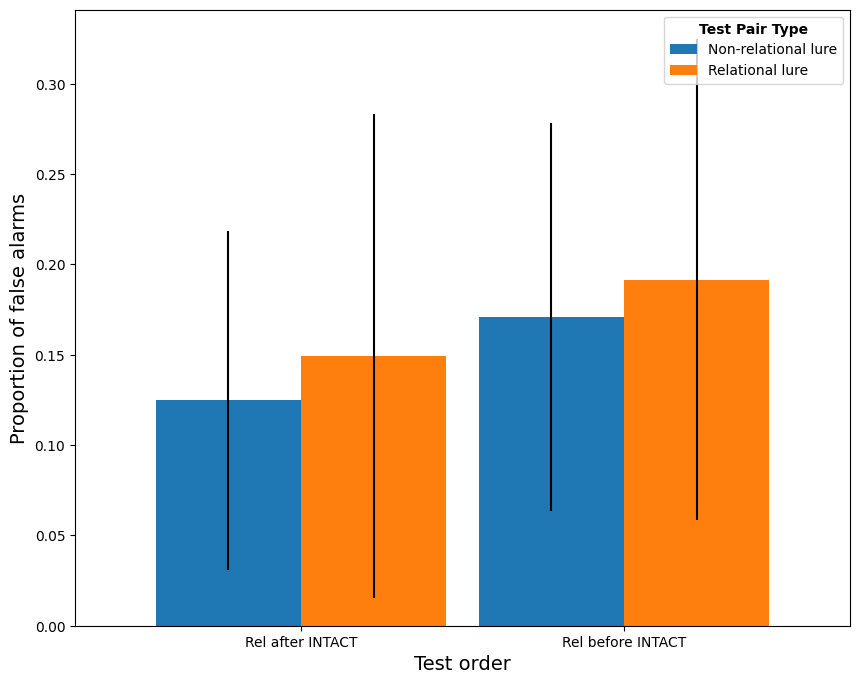

In [93]:
# make the plot
means = [after_intact_non_rel_lure_false_alarms_mean, after_intact_rel_lure_false_alarms_mean, before_intact_non_rel_lure_false_alarms_mean , before_intact_rel_lure_mean]  # Replace with your actual means
stds = [after_intact_non_rel_lure_false_alarms_std, after_intact_rel_lure_false_alarms_std, before_intact_non_rel_lure_false_alarms_std, before_intact_rel_lure_std]  # Standard deviations for whiskers

# create data
df = pd.DataFrame([['Rel after INTACT', means[0], means[1]], ['Rel before INTACT', means[2], means[3]]], columns=['Test order', 'Non-relational lure', 'Relational lure'])
ax = df.plot(x='Test order',
        kind='bar',
        yerr=[[stds[0], stds[2]], [stds[1], stds[3]]],
        stacked=False,
        width=0.9,  # Adjust bar width
        figsize=(10, 8))  # Adjust figure size (width, height)
plt.ylabel('Proportion of false alarms', fontsize=14)
plt.xlabel('Test order', fontsize=14)  # Increased xlabel font size
plt.legend(title='Test Pair Type', title_fontproperties={'weight': 'bold'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.show()

In [94]:
df.head()

,Test order,Non-relational lure,Relational lure
0,Rel after INTACT,0.124710,0.149560
1,Rel before INTACT,0.170855,0.191547


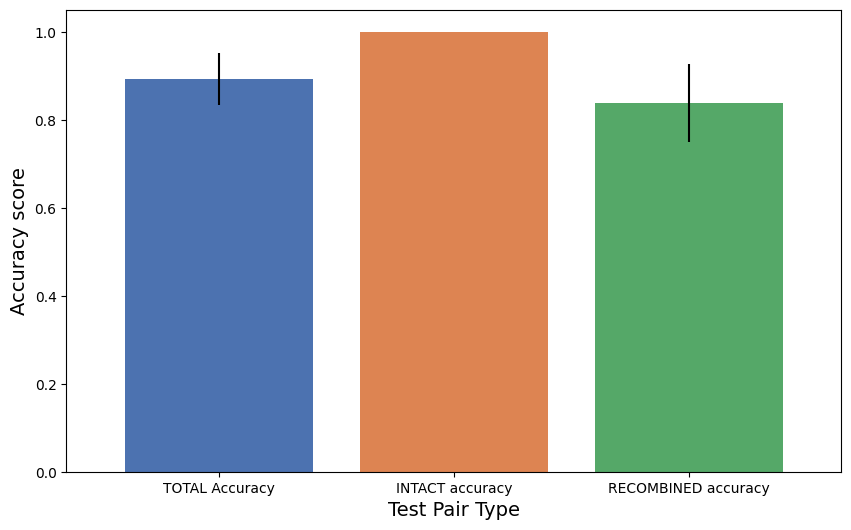

In [112]:
# PLOT FOR ACCURACIES

# compute means and stds

total_accuracies_exp_1_mean = np.mean(total_accuracies_exp_1)
total_accuracies_exp_1_std = np.std(total_accuracies_exp_1)

intact_accuracies_exp_1_mean = np.mean(intact_accuracies_exp_1)
intact_accuracies_exp_1_std = np.std(intact_accuracies_exp_1)

recombined_accuracies_exp_1_mean = np.mean(recombined_accuracies_exp_1)
recombined_accuracies_exp_1_std = np.std(recombined_accuracies_exp_1)

# make the plot
means = [total_accuracies_exp_1_mean, intact_accuracies_exp_1_mean, recombined_accuracies_exp_1_mean]  # Replace with your actual means
stds = [total_accuracies_exp_1_std, intact_accuracies_exp_1_std, recombined_accuracies_exp_1_std]  # Standard deviations for whiskers

# create data
df = pd.DataFrame({
    'Type': ['TOTAL Accuracy', 'INTACT accuracy', 'RECOMBINED accuracy'],
    'Accuracy score': means,
    'Std Dev': stds  # Include standard deviations in the DataFrame
})
# df = pd.DataFrame([['Total Accuracy', means[0]], ['INTACT accuracy', means[1]], ['RECOMBINED accuracy', means[2]]], columns=['Type', 'Accuracy score'])
colors = sns.color_palette("deep", n_colors=3)
ax = df.plot(x='Type',
             y='Accuracy score',
        kind='bar',
             color=colors,
             legend = False,
        yerr='Std Dev',
        width=0.8,  # Adjust bar width
        figsize=(10, 6))  # Adjust figure size (width, height)
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Test Pair Type', fontsize=14)  # Increased xlabel font size
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.show()

In [96]:
df.head()

,Type,Accuracy score
0,Total Accuracy,0.892063
1,INTACT accuracy,1.000000
2,RECOMBINED accuracy,0.838095


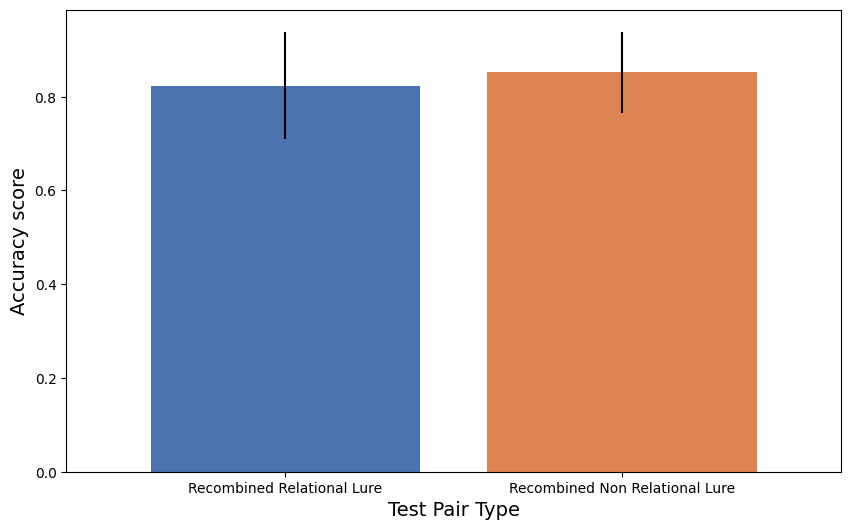

In [125]:
# Plot for rel lure and non rel lure accuracies

yes_rel_accuracies_exp_1_mean = np.mean(yes_rel_accuracies_exp_1)
yes_rel_accuracies_exp_1_std = np.std(yes_rel_accuracies_exp_1)

no_rel_accuracies_exp_1_mean = np.mean(no_rel_accuracies_exp_1)
no_rel_accuracies_exp_1_std = np.std(no_rel_accuracies_exp_1)

# make the plot
means = [yes_rel_accuracies_exp_1_mean, no_rel_accuracies_exp_1_mean]  # Replace with your actual means
stds = [yes_rel_accuracies_exp_1_std, no_rel_accuracies_exp_1_std]  # Standard deviations for whiskers

# create data
df = pd.DataFrame({
    'Type': ['Recombined Relational Lure', 'Recombined Non Relational Lure'],
    'Accuracy score': means,
    'Std Dev': stds  # Include standard deviations in the DataFrame
})
colors = sns.color_palette("deep", n_colors=2)
ax = df.plot(x='Type',
             y='Accuracy score',
        kind='bar',
             color=colors,
             legend = False,
        yerr='Std Dev',
        width=0.8,  # Adjust bar width
        figsize=(10, 6))  # Adjust figure size (width, height)
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Test Pair Type', fontsize=14)  # Increased xlabel font size
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.show()

## Esperimento 2

In [114]:
exp2_test_df.head(100)

,Relation Type,Word_1,Word_2,Condition,Condition_number,Response,Response_Number,Current_Accuracy
0,0,squirrel,waist,new,0,NEW \n,0.0,100.000000
1,0,song,ax,new,0,NEW \n\n\n,0.0,100.000000
2,0,bus,carman,new,0,NEW \n\n\n,0.0,100.000000
3,0,bread,line,new,0,NEW \n\n\n,0.0,100.000000
4,0,door,hearing,new,0,NEW \n\n\n,0.0,100.000000
...,...,...,...,...,...,...,...,...
95,33,liter,gallon,recombined,1,RECOMBINED \n\n\n\n\n\n\n\n\n\n\n\n,1.0,95.833333
96,29,plague,rat,intact/old,2,OLD \n\n\n\n\n\n\n\n\n\n\n\n\n\n,2.0,95.876289
97,0,flu,inch,new,0,NEW \n\n\n\n\n\n\n\n\n\n\n\n\n,0.0,95.918367
98,0,bike,bedroom,new,0,NEW \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,0.0,95.959596


In [116]:
# keep only up to index 415
first_na_row_index = exp2_test_df.isnull().any(axis=1).idxmax()
print(first_na_row_index)

416


In [117]:
# cut dataset to 416
exp2_df = exp2_test_df.iloc[:416]

In [129]:
exp2_df.tail()

,Relation Type,Word_1,Word_2,Condition,Condition_number,Response,Response_Number,Current_Accuracy
411,0,fruit,core,new,0,NEW \n\n\n\n\n\n\n\n\n\n,0,96.844660
412,56,butcher,knife,recombined,1,RECOMBINED \n\n\n\n\n\n\n\n\n\n\n\n\n\n,1,96.852300
413,52,chess,check-mate,intact/old,2,OLD \n\n\n\n\n\n\n\n\n\n\n\n\n\n,2,96.859903
414,14,couch,living-room,intact/old,2,OLD \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,2,96.867470
415,55,milk,cheese,intact/old,2,OLD \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,2,96.875000


In [128]:
# make Response_Number column integer
exp2_df['Response_Number'] = exp2_df['Response_Number'].astype(int)

<ipython-input-128-a90b5b5fd7eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp2_df['Response_Number'] = exp2_df['Response_Number'].astype(int)


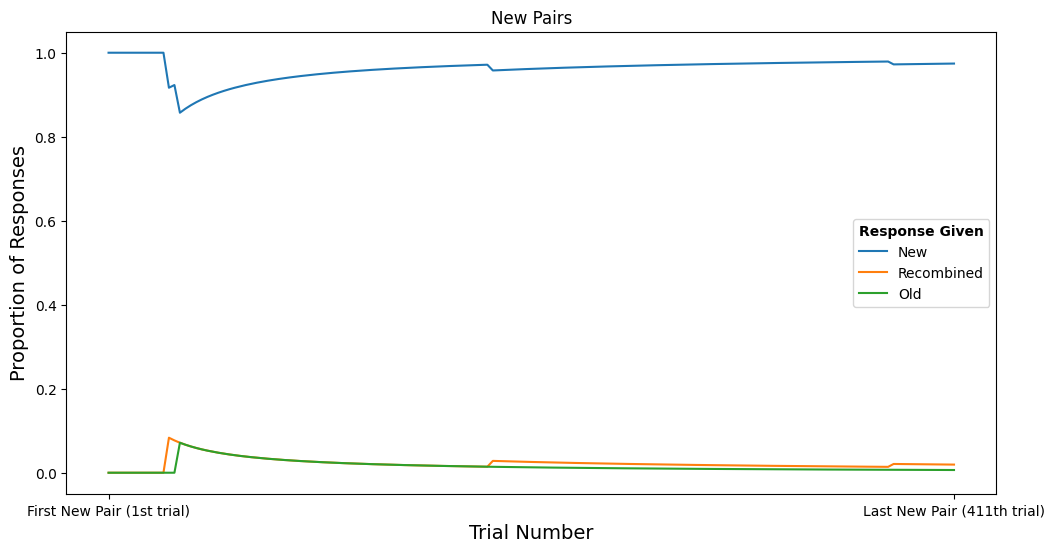

In [153]:
# types:
# 0 = new
# 1 = recombined
# 2 = old

# GRAPH 1: ACCURACY ON NEW PAIRS WHILE THE TRIALS GOES ON
# slice df in order to get only new pairs
new_pairs_df = exp2_df[exp2_df['Condition_number'] == 0]
new_pairs_df = new_pairs_df.reset_index(drop=True)
# Calculate cumulative counts for each value
new_pairs_df['count_new'] = (new_pairs_df['Response_Number'] == 0).cumsum()
new_pairs_df['count_recombined'] = (new_pairs_df['Response_Number'] == 1).cumsum()
new_pairs_df['count_old'] = (new_pairs_df['Response_Number'] == 2).cumsum()
# calculate proprtion of each response
new_pairs_df['proportion_new'] = new_pairs_df.apply(lambda row: row['count_new'] / (row['count_new']+ row['count_recombined']+ row['count_old']), axis=1)
new_pairs_df['proportion_recombined'] = new_pairs_df.apply(lambda row: row['count_recombined'] / (row['count_new']+ row['count_recombined']+ row['count_old']), axis=1)
new_pairs_df['proportion_old'] = new_pairs_df.apply(lambda row: row['count_old'] / (row['count_new']+ row['count_recombined']+ row['count_old']), axis=1)

# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(new_pairs_df.index, new_pairs_df['proportion_new'], label='New')
plt.plot(new_pairs_df.index, new_pairs_df['proportion_recombined'], label='Recombined')
plt.plot(new_pairs_df.index, new_pairs_df['proportion_old'], label='Old')

# Set labels and title
plt.title('New Pairs')
plt.xlabel('Trial Number', fontsize=14)
plt.ylabel('Proportion of Responses', fontsize=14)
plt.xticks([new_pairs_df.index[0], new_pairs_df.index[-1]], ['First New Pair (1st trial)', 'Last New Pair (411th trial)'])
# Add a legend
plt.legend(title='Response Given', title_fontproperties={'weight': 'bold'})

# Display the plot
plt.show()

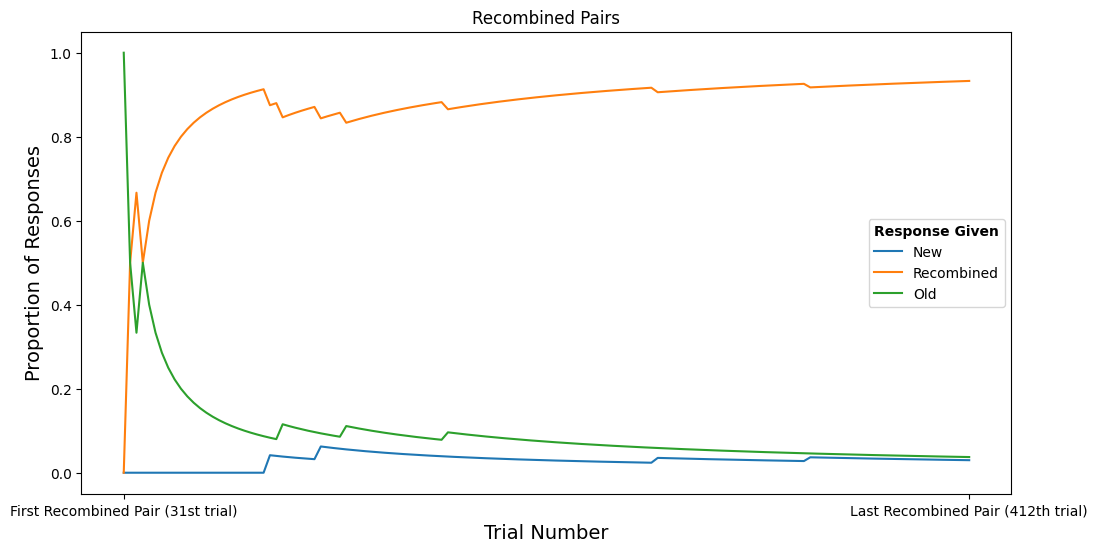

In [158]:
# types:
# 0 = new
# 1 = recombined
# 2 = old

# GRAPH 2: ACCURACY ON RECOMBINED PAIRS WHILE THE TRIALS GOES ON
# slice df in order to get only new pairs
recombined_pairs_df = exp2_df[exp2_df['Condition_number'] == 1]
recombined_pairs_df = recombined_pairs_df.reset_index(drop=True)
# Calculate cumulative counts for each value
recombined_pairs_df['count_new'] = (recombined_pairs_df['Response_Number'] == 0).cumsum()
recombined_pairs_df['count_recombined'] = (recombined_pairs_df['Response_Number'] == 1).cumsum()
recombined_pairs_df['count_old'] = (recombined_pairs_df['Response_Number'] == 2).cumsum()
# calculate proprtion of each response
recombined_pairs_df['proportion_new'] = recombined_pairs_df.apply(lambda row: row['count_new'] / (row['count_new']+ row['count_recombined']+ row['count_old']), axis=1)
recombined_pairs_df['proportion_recombined'] = recombined_pairs_df.apply(lambda row: row['count_recombined'] / (row['count_new']+ row['count_recombined']+ row['count_old']), axis=1)
recombined_pairs_df['proportion_old'] = recombined_pairs_df.apply(lambda row: row['count_old'] / (row['count_new']+ row['count_recombined']+ row['count_old']), axis=1)

# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(recombined_pairs_df.index, recombined_pairs_df['proportion_new'], label='New')
plt.plot(recombined_pairs_df.index, recombined_pairs_df['proportion_recombined'], label='Recombined')
plt.plot(recombined_pairs_df.index, recombined_pairs_df['proportion_old'], label='Old')

# Set labels and title
plt.title('Recombined Pairs')
plt.xlabel('Trial Number', fontsize=14)
plt.ylabel('Proportion of Responses', fontsize=14)
plt.xticks([recombined_pairs_df.index[0], recombined_pairs_df.index[-1]], ['First Recombined Pair (31st trial)', 'Last Recombined Pair (412th trial)'])
# Add a legend
plt.legend(title='Response Given', title_fontproperties={'weight': 'bold'})

# Display the plot
plt.show()

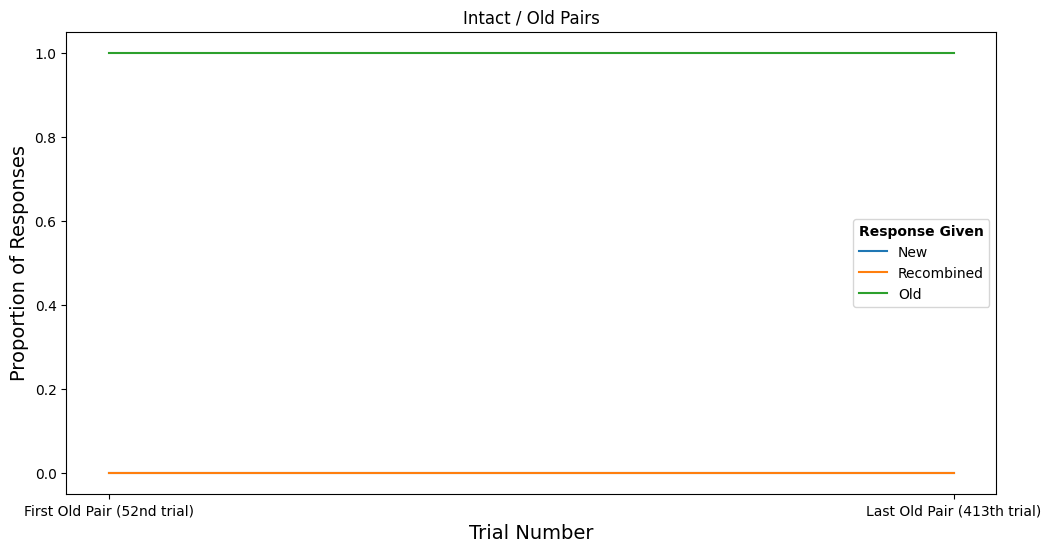

In [165]:
# types:
# 0 = new
# 1 = recombined
# 2 = old

# GRAPH 2: ACCURACY ON OLD PAIRS WHILE THE TRIALS GOES ON
# slice df in order to get only new pairs
old_pairs_df = exp2_df[exp2_df['Condition_number'] == 2]
old_pairs_df = old_pairs_df.reset_index(drop=True)
# Calculate cumulative counts for each value
old_pairs_df['count_new'] = (old_pairs_df['Response_Number'] == 0).cumsum()
old_pairs_df['count_recombined'] = (old_pairs_df['Response_Number'] == 1).cumsum()
old_pairs_df['count_old'] = (old_pairs_df['Response_Number'] == 2).cumsum()
# calculate proprtion of each response
old_pairs_df['proportion_new'] = old_pairs_df.apply(lambda row: row['count_new'] / (row['count_new']+ row['count_recombined']+ row['count_old']), axis=1)
old_pairs_df['proportion_recombined'] = old_pairs_df.apply(lambda row: row['count_recombined'] / (row['count_new']+ row['count_recombined']+ row['count_old']), axis=1)
old_pairs_df['proportion_old'] = old_pairs_df.apply(lambda row: row['count_old'] / (row['count_new']+ row['count_recombined']+ row['count_old']), axis=1)

# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(old_pairs_df.index, old_pairs_df['proportion_new'], label='New')
plt.plot(old_pairs_df.index, old_pairs_df['proportion_recombined'], label='Recombined')
plt.plot(old_pairs_df.index, old_pairs_df['proportion_old'], label='Old')

# Set labels and title
plt.title('Intact / Old Pairs')
plt.xlabel('Trial Number', fontsize=14)
plt.ylabel('Proportion of Responses', fontsize=14)
plt.xticks([old_pairs_df.index[0], old_pairs_df.index[-1]], ['First Old Pair (52nd trial)', 'Last Old Pair (413th trial)'])
# Add a legend
plt.legend(title='Response Given', title_fontproperties={'weight': 'bold'})

# Display the plot
plt.show()

In [164]:
old_pairs_df.head(5)

,Relation Type,Word_1,Word_2,Condition,Condition_number,Response,Response_Number,Current_Accuracy,count_new,count_recombined,count_old,proportion_new,proportion_recombined,proportion_old
53,56,fisherman,fishing,intact/old,2,OLD \n\n\n\n\n,2,92.592593,0,0,1,0.0,0.0,1.0
65,55,grape,wine,intact/old,2,OLD \n\n\n\n\n\n\n\n\n,2,93.939394,0,0,2,0.0,0.0,1.0
70,3,eye,vision,intact/old,2,OLD \n\n\n\n\n\n\n,2,94.366197,0,0,3,0.0,0.0,1.0
72,17,butterfly,caterpillar,intact/old,2,OLD \n\n\n\n\n\n\n\n\n,2,94.520548,0,0,4,0.0,0.0,1.0
73,13,cat,paw,intact/old,2,OLD \n\n\n\n\n\n\n\n,2,94.594595,0,0,5,0.0,0.0,1.0


<ipython-input-173-24fd902bcbc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp2_df['Rounded_Accuracy'] = exp2_df['Current_Accuracy'].round(2)


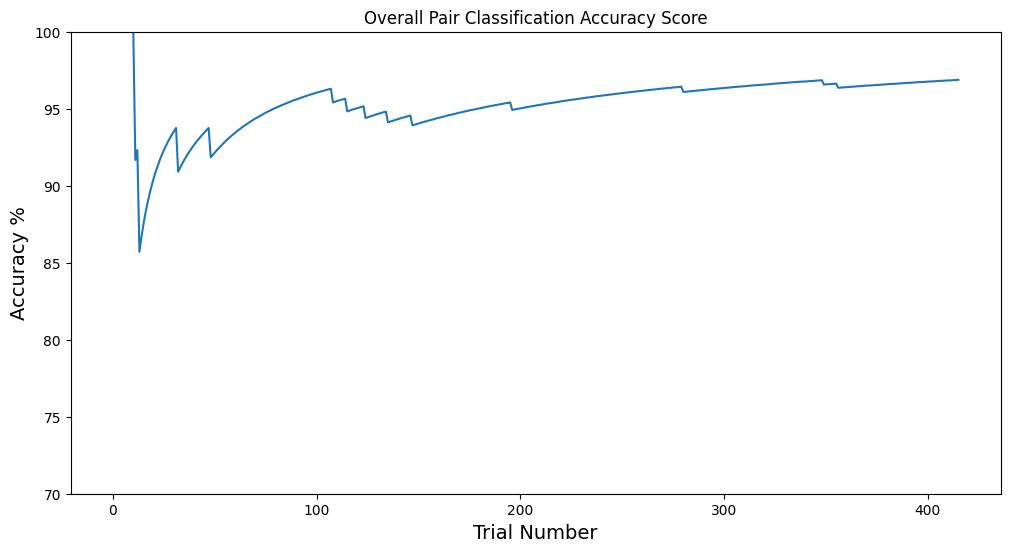

In [173]:
# overall accuracy plot
exp2_df['Rounded_Accuracy'] = exp2_df['Current_Accuracy'].round(2)
# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(exp2_df.index, exp2_df['Rounded_Accuracy'], label='Overall Accuracy Score')

# Set labels and title
plt.title('Overall Pair Classification Accuracy Score')
plt.ylim(70, 100)
plt.xlabel('Trial Number', fontsize=14)
plt.ylabel('Accuracy %', fontsize=14)

# Display the plot
plt.show()

In [174]:
# Count and print the number of 'new' 'recombined' 'old' entries in the dataset
# number new
print(len(exp2_df[exp2_df['Condition_number'] == 0]))
# number recombined
print(len(exp2_df[exp2_df['Condition_number'] == 1]))
# number old
print(len(exp2_df[exp2_df['Condition_number'] == 2]))

155
134
127


# CREAZIONE FILE RISPOSTE MODELLO ESPERIMENTO 1

In [176]:
# Experiment 1
resp_1_df = pd.read_csv('Experiment1Test_1_model_responses.csv')
resp_2_df = pd.read_csv('Experiment1Test_2_model_responses.csv')
resp_3_df = pd.read_csv('Experiment1Test_3_model_responses.csv')
resp_4_df = pd.read_csv('Experiment1Test_4_model_responses.csv')
resp_5_df = pd.read_csv('Experiment1Test_5_model_responses.csv')
resp_6_df = pd.read_csv('Experiment1Test_6_model_responses.csv')
resp_7_df = pd.read_csv('Experiment1Test_7_model_responses.csv')
resp_8_df = pd.read_csv('Experiment1Test_8_model_responses.csv')
resp_9_df = pd.read_csv('Experiment1Test_9_model_responses.csv')
resp_10_df = pd.read_csv('Experiment1Test_10_model_responses.csv')
# create list
responses1_list = [resp_1_df, resp_2_df, resp_3_df, resp_4_df, resp_5_df, resp_6_df, resp_7_df, resp_8_df, resp_9_df, resp_10_df]

In [179]:
# exp1_1_df
for df in experiment1_list:
  # drop columns
  df.drop(['AfterIntact', 'truth', 'prediction'], axis=1, inplace=True)
  # rename  columns
  df.rename(columns={'pair_group': 'Pair Group'}, inplace=True)
  df.rename(columns={'correct': 'Comment'}, inplace=True)
  df.rename(columns={'Word1': 'First Word'}, inplace=True)
  df.rename(columns={'Word2': 'Second Word'}, inplace=True)
  df.rename(columns={'Type': 'Ground Truth'}, inplace=True)
  # Comment: change 1 with correct 0 with error
  df['Comment'] = df['Comment'].replace({1: 'Correct', 0: 'Wrong'})

,Pair Group,First Word,Second Word,Ground Truth,Response,Comment
0,20,mattress,sheet,Intact,intact \n,Correct
1,20,liter,gallon,Recombined Non Rel,recombined \n,Correct
2,21,membrane,cell,Recombined Non Rel,recombined \n,Correct
3,19,floor,carpet,Recombined Non Rel,recombined \n,Correct
4,5,water,pipe,Recombined Non Rel,recombined \n,Correct


In [181]:
# Concatenate DataFrames
concatenated_df = pd.concat(experiment1_list)

In [182]:
len(concatenated_df)

630

In [183]:
# save file
concatenated_df.to_csv('First experiment pairs and model responses2.csv', index=False)

#CREAZIONE FILE RISPOSTE MODELLO ESPERIMENTO 1

In [195]:
exp2_df.tail()

,Relation Type,Word_1,Word_2,Condition,Condition_number,Response,Response_Number,Current_Accuracy,Rounded_Accuracy,Comment
411,0,fruit,core,new,0,NEW \n\n\n\n\n\n\n\n\n\n,0,96.844660,96.84,Correct
412,56,butcher,knife,recombined,1,RECOMBINED \n\n\n\n\n\n\n\n\n\n\n\n\n\n,1,96.852300,96.85,Correct
413,52,chess,check-mate,intact/old,2,OLD \n\n\n\n\n\n\n\n\n\n\n\n\n\n,2,96.859903,96.86,Correct
414,14,couch,living-room,intact/old,2,OLD \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,2,96.867470,96.87,Correct
415,55,milk,cheese,intact/old,2,OLD \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,2,96.875000,96.88,Correct


In [189]:
def compute_correct_2(row):
    if row['Condition_number'] == row['Response_Number'] :
        return "Correct"
    else:
        return "Wrong"

In [193]:
exp2_df['Comment'] = exp2_df.apply(lambda row: compute_correct_2(row), axis=1)

<ipython-input-193-4e31cfe5c4f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp2_df['Comment'] = exp2_df.apply(lambda row: compute_correct_2(row), axis=1)


In [196]:
# rename  columns
exp2_df.rename(columns={'Word_1': 'First Word'}, inplace=True)
exp2_df.rename(columns={'Word_2': 'Second Word'}, inplace=True)
exp2_df.rename(columns={'Condition': 'Ground Truth'}, inplace=True)
# drop columns
exp2_df.drop(['Condition_number', 'Response_Number', 'Current_Accuracy','Rounded_Accuracy'], axis=1, inplace=True)

<ipython-input-196-721002503bea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp2_df.rename(columns={'Word_1': 'First Word'}, inplace=True)
<ipython-input-196-721002503bea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp2_df.rename(columns={'Word_2': 'Second Word'}, inplace=True)
<ipython-input-196-721002503bea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp2_df.rename(columns={'Condition': 'Ground Truth'}, inplace=True

In [197]:
exp2_df.head()

,Relation Type,First Word,Second Word,Ground Truth,Response,Comment
0,0,squirrel,waist,new,NEW \n,Correct
1,0,song,ax,new,NEW \n\n\n,Correct
2,0,bus,carman,new,NEW \n\n\n,Correct
3,0,bread,line,new,NEW \n\n\n,Correct
4,0,door,hearing,new,NEW \n\n\n,Correct


In [198]:
# save file
exp2_df.to_csv('Second experiment pairs and model responses.csv', index=False)